# <span style="color:blue">Evaluating Sequence Learning Models for Identifying Hate Speech using Explainable AI - Preprocessing Notebook</span>

## Dataset construction & preprocessing notebook

Used Datasets: 
* [Hate Speech and Offensive Language Dataset](https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset)
* [Twitter Sentiment Analysis](https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech)
* [Dynamically Generated Hate Speech Dataset](https://www.kaggle.com/datasets/usharengaraju/dynamically-generated-hate-speech-dataset)

Author: Amir Mozahebi <br>
Thesis: Evaluating Sequence Learning Models for Identifying Hate Speech using Explainable AI


## 1. Load & analyze dataset

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re 
import string

In [2]:
#Method - Show the distribution of labels as bar chart
def dfBarPlot(df):
    fig = df["label"].value_counts().plot(kind="bar")
    fig.bar_label(fig.containers[0])
    figure(figsize=(8, 6), dpi=300)
    plt.savefig('../plots/preprocessing_plots/label_distribution.png', dpi=300)
    plt.show()

### Load 1st dataset

#### Source: [Hate Speech & Offensive Language Dataset](https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset/code)

#### Labels:
* 0 - Hate Speech 
* 1 - Offensive Language
* 2 - Neither

In [3]:
#Load the training data
df = pd.read_csv("../data/hatespeech_multiclass_data.csv")

In [4]:
#Show number of labeled tweets inside the dataset
len(df)

24783

In [5]:
#Show the first 10 entries of the dataset -> Label - 0 = No Hatespeech, Label - 1 = Hatespeech is contained 
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [6]:
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [7]:
df = df.drop(columns=['Unnamed: 0','count', 'hate_speech', 'offensive_language', 'neither'])

In [8]:
df.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [9]:
df.rename(columns = {'class':'label'}, inplace = True)

In [10]:
df.head(10)

,label,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [11]:
# Show the first 5 Sentences in full
for i in range(0,20):
    print(df["tweet"][i])

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"
!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"
!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
" &amp; you might not get ya bitch back &amp; thats that "
" @rhythmixx_ :hobbies inclu

In [12]:
#Show distribution of labels
df["label"].value_counts()

1    19190
2     4163
0     1430
Name: label, dtype: int64

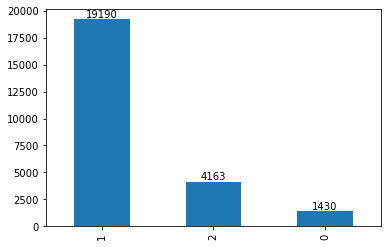

<Figure size 2400x1800 with 0 Axes>

In [13]:
dfBarPlot(df)

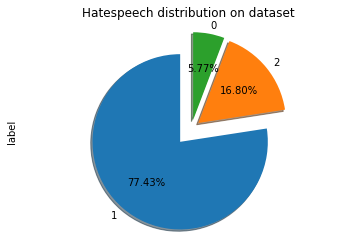

<Figure size 2400x1800 with 0 Axes>

In [14]:
#Show the distribution of labels as pie chart
df["label"].value_counts().plot.pie(startangle=90, shadow=True,explode=(0.2, 0.1, 0.1), autopct='%1.2f%%')
plt.title('Hatespeech distribution on dataset')
plt.axis('equal')
figure(figsize=(8, 6), dpi=300)
plt.savefig('../plots/preprocessing_plots/label_distribution_pie.png', dpi=300)
plt.show()

In [15]:
df_nohate = df.loc[df['label'] == 2]
df_offensive = df.loc[df['label'] == 1]
df_hate = df.loc[df['label'] == 0]

In [16]:
# If 10.000 training samples per laber are needed
#df_offensive = df_offensive[0:10000]

In [17]:
# If 15.000 training samples per laber are needed
#df_offensive = df_offensive[0:15000]

In [18]:
# If 18.000 training samples per laber are needed
df_offensive = df_offensive[0:18000]

In [19]:
frames = [df_nohate, df_offensive ,df_hate]
df = pd.concat(frames, ignore_index=True)

In [20]:
df["label"].value_counts()

1    18000
2     4163
0     1430
Name: label, dtype: int64

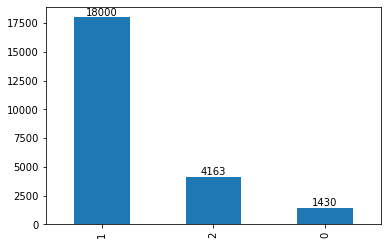

<Figure size 2400x1800 with 0 Axes>

In [21]:
dfBarPlot(df)

### Load 2nd dataset

#### Source:  [Twitter Sentiment Analysis Dataset](https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech)

#### Labels:
* 0 - No Hatespeech
* 1 - Hatespeech

In [22]:
#Load second training dataset to bring more balance to the previous dataset
df2 = pd.read_csv("../data/sentiment_analysis_hate_speech.csv")

In [23]:
len(df2)

31962

In [24]:
df2.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [25]:
df2 = df2.drop(columns=['id'])

In [26]:
df2["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [27]:
# Adjust the labels to fit the 1st dataset
df2["label"] = df2["label"].replace(0, 2)
df2["label"] = df2["label"].replace(1, 0)

In [28]:
df2["label"].value_counts()

2    29720
0     2242
Name: label, dtype: int64

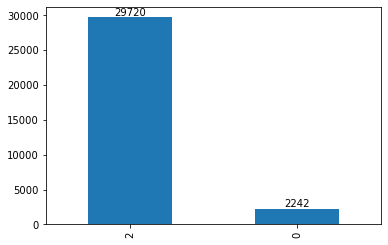

<Figure size 2400x1800 with 0 Axes>

In [29]:
#Show the distribution of labels as bar chart
dfBarPlot(df2)

In [30]:
df2_nohate = df2.loc[df2['label'] == 2]
df2_hate = df2.loc[df2['label'] == 0]

In [31]:
# If 10.0000 samples per label 
#df2_nohate = df2_nohate[0:2919]

In [32]:
# If 15.0000 samples per label 
#df2_nohate = df2_nohate[0:5419]

In [33]:
# If 18.0000 samples per label 
df2_nohate = df2_nohate[0:6919]

In [34]:
frames = [df2_nohate, df2_hate]
df2 = pd.concat(frames)

In [35]:
df2["label"].value_counts()

2    6919
0    2242
Name: label, dtype: int64

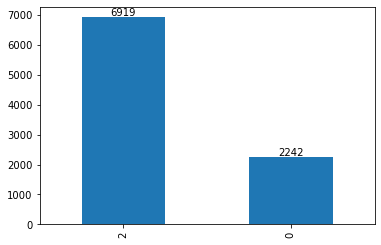

<Figure size 2400x1800 with 0 Axes>

In [36]:
dfBarPlot(df2)

### Load 3rd dataset

#### Source: [Dynamically Generated Hate Speech Dataset](https://www.kaggle.com/datasets/usharengaraju/dynamically-generated-hate-speech-dataset)

#### Labels:
* hate 
* nohate

In [37]:
df3 = pd.read_csv("../data/dynamically_generated_hate_speech.csv")

In [38]:
df3.head(10)

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm
5,6,10005,I don't work this hard so that those migrants ...,hate,notgiven,True,0.99506,dynabench entry,1,train,cagnluiznm
6,7,10006,I don't work this hard so that those foreigner...,hate,notgiven,True,0.99340,dynabench entry,1,train,cagnluiznm
7,8,10007,I don't work this hard so that those Hispanics...,hate,notgiven,True,0.98625,dynabench entry,1,train,cagnluiznm
8,9,10008,I don't work this hard so that those chavs can...,hate,notgiven,True,0.95252,dynabench entry,1,test,cagnluiznm
9,10,10009,I don't work this hard so that all those pakis...,hate,notgiven,False,0.09288,dynabench entry,1,train,cagnluiznm


In [39]:
df3 = df3.loc[:, df3.columns.intersection(['text','label'])]

In [40]:
df3.head(10)

,text,label
0,It should be legal for a husband to rape his wife,hate
1,dalits are lowlife scum,hate
2,dalits are lowlives,hate
3,It was a better world when women dare not ques...,hate
4,I don't work this hard so that those immigrant...,hate
5,I don't work this hard so that those migrants ...,hate
6,I don't work this hard so that those foreigner...,hate
7,I don't work this hard so that those Hispanics...,hate
8,I don't work this hard so that those chavs can...,hate
9,I don't work this hard so that all those pakis...,hate


In [41]:
df3.rename(columns={"text": "tweet"}, inplace=True)

In [42]:
# Adjust the labels to fit the 1st dataset
df3["label"] = df3["label"].replace("hate", 0)
df3["label"] = df3["label"].replace("nothate", 2)

In [43]:
df3["label"].value_counts()

0    22124
2    18499
Name: label, dtype: int64

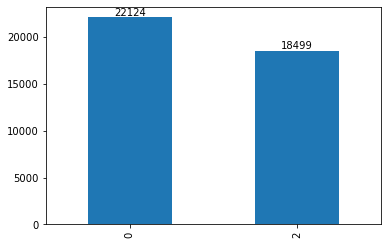

<Figure size 2400x1800 with 0 Axes>

In [44]:
#Show the distribution of labels as bar chart
dfBarPlot(df3)

In [45]:
df3_nohate = df3.loc[df3['label'] == 2]
df3_hate = df3.loc[df3['label'] == 0]

In [46]:
# If 10.0000 samples per label 
#df3_nohate = df3_nohate[0:2918]
#df3_hate = df3_hate[0:6328]

In [47]:
# If 15.0000 samples per label 
#df3_nohate = df3_nohate[0:5418]
#df3_hate = df3_hate[0:11328]

In [48]:
# If 18.0000 samples per label 
df3_nohate = df3_nohate[0:6918]
df3_hate = df3_hate[0:14328]

In [49]:
frames = [df3_nohate, df3_hate]
df3 = pd.concat(frames, ignore_index=True)

In [50]:
df3["label"].value_counts()

0    14328
2     6918
Name: label, dtype: int64

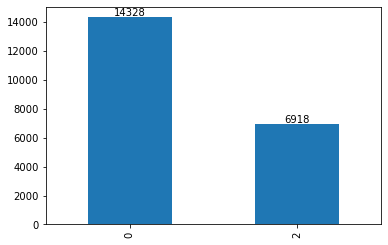

<Figure size 2400x1800 with 0 Axes>

In [51]:
dfBarPlot(df3)

### Merge datasets to retrieve a balanced training dataset

In [52]:
frames = [df, df2, df3]
df = pd.concat(frames, ignore_index=True)

In [53]:
df["label"].value_counts()

2    18000
1    18000
0    18000
Name: label, dtype: int64

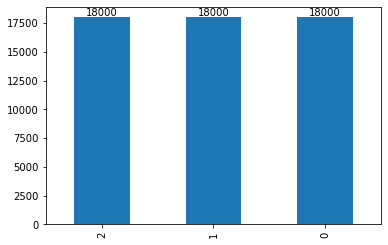

<Figure size 2400x1800 with 0 Axes>

In [54]:
#Show the distribution of labels as bar chart
dfBarPlot(df)

In [55]:
df.head(10)

,label,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,2,""" momma said no pussy cats inside my doghouse """
2,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
3,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
4,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."
5,2,"""@ArizonasFinest6: Why the eggplant emoji doe?..."
6,2,"""@BabyAnimalPics: baby monkey bathtime http://..."
7,2,"""@DomWorldPeace: Baseball season for the win. ..."
8,2,"""@DunderbaIl: I'm an early bird and I'm a nigh..."
9,2,"""@EdgarPixar: Overdosing on heavy drugs doesn'..."


In [56]:
#Shuffle the dataset
df = df.sample(frac=1)

In [57]:
df.head(10)

,label,tweet
24879,2,cena de cumple thanks mom #brithday #home #f...
7338,1,@Montulos Lakers are trash
22978,0,I never had any friends the entire time I live...
28842,2,"""...your stage time and red carpet schedule......"
43310,0,I would love to stab every black person on thi...
32384,0,@user what you should know about #environmenta...
26397,2,@user government acted earlyyyyyyyyyyyy. at la...
18066,1,RT @XANAXDREAMS: if u know how to French inhal...
53712,0,A society full of ladies working only reduces ...
47252,0,"it is horrible, i don't feel safe since a gay ..."


## Word appearance in the dataset

In [58]:
#Count word appearance
from collections import Counter

def countAppearance(tweets):
    counter = Counter()
    for tweet in tweets:
        for word in tweet.split():
            counter[word] += 1
    return counter
    

In [59]:
wordCounter = countAppearance(df["tweet"])

In [60]:
len(wordCounter)

87678

In [61]:
wordCounter

Counter({'cena': 1,
         'de': 23,
         'cumple': 1,
         'thanks': 147,
         'mom': 97,
         '#brithday': 1,
         '#home': 24,
         '#family': 57,
         '@Montulos': 1,
         'Lakers': 14,
         'are': 8429,
         'trash': 939,
         'I': 13851,
         'never': 698,
         'had': 640,
         'any': 468,
         'friends': 297,
         'the': 16681,
         'entire': 34,
         'time': 768,
         'lived': 20,
         'in': 6837,
         '#Virginia.': 1,
         'No': 451,
         'one': 1301,
         'was': 1861,
         'cool': 91,
         'to': 14539,
         'me.': 180,
         'hope': 269,
         'those': 664,
         'white': 1019,
         'Southerners': 2,
         'all': 3751,
         'die.': 16,
         '"...your': 1,
         'stage': 19,
         'and': 9708,
         'red': 102,
         'carpet': 37,
         'schedule..."': 1,
         'ð\x9f\x98±': 7,
         'la...': 2,
         'if': 1577,
        

In [62]:
wordCounter.most_common(10)

[('a', 16855),
 ('the', 16681),
 ('to', 14539),
 ('I', 13851),
 ('is', 10547),
 ('and', 9708),
 ('of', 9039),
 ('you', 8489),
 ('are', 8429),
 ('RT', 7471)]

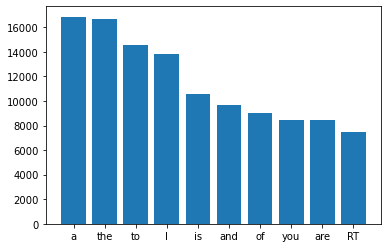

In [63]:
y = [count for tag, count in wordCounter.most_common(10)]
x = [tag for tag, count in wordCounter.most_common(10)]
plt.bar(x, y)
plt.savefig('../plots/preprocessing_plots/word_appearance_before.png', dpi=1000)

In [64]:
#Import wordcloud and wordcloud function
from wordcloud import WordCloud

def generateWordCloud(tweets):
    wordcloud = WordCloud(width=1400, height=600, background_color="white").generate(tweets)
    return wordcloud

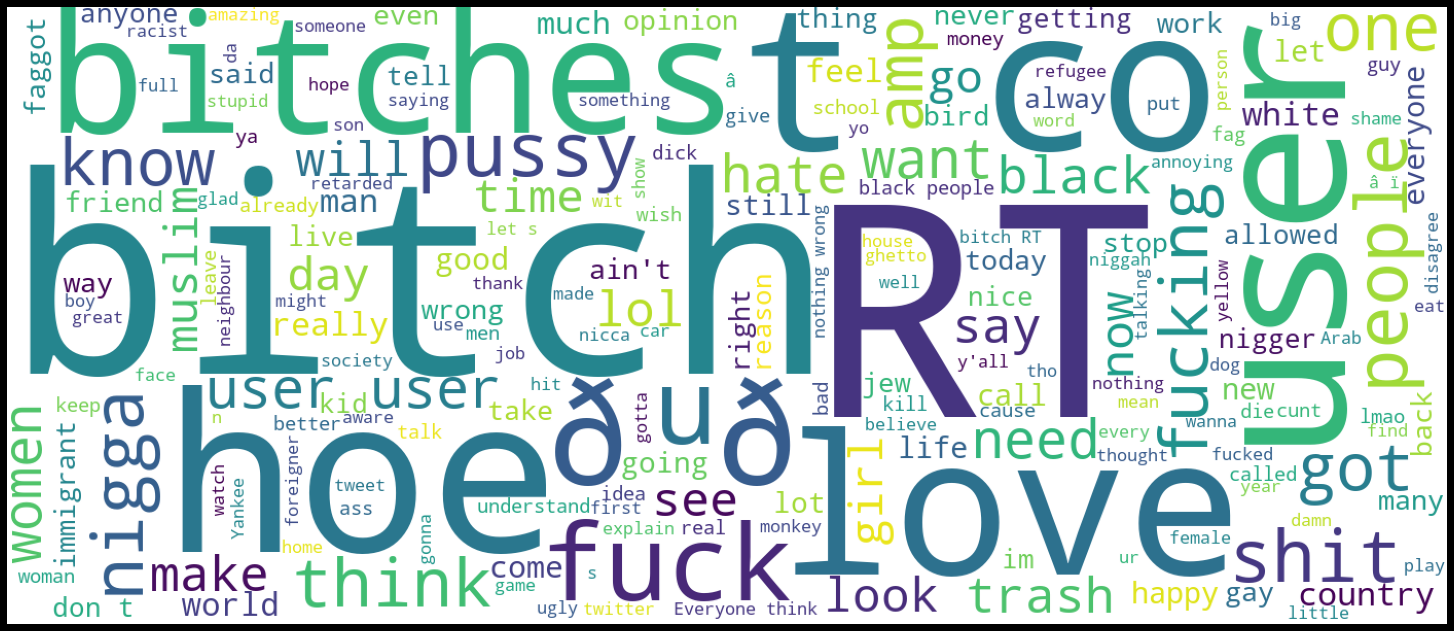

<Figure size 432x288 with 0 Axes>

In [65]:
#Generate a wordcloud
wordcloud = generateWordCloud(' '.join(df['tweet']))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('../plots/preprocessing_plots/wc_before.png', dpi=300)

## 2. Preprocessing

Now that we have loaded the dataset we need to perform some data preprocessing. <br>
Cleaning up the data will make our later rnn models (RNN, LSTM, GRU) perform better <br>

We will perform the following preprocessing steps: <br>

- Remove ...
- Tokenization
- Lemminization


### 2.1 Remove 

In [66]:
#Preprocessing - Remove hashtag symbols
def removeHashtags(tweet):
  tweet = re.sub(r'#', '', tweet)
  return tweet

In [67]:
#Preprocessing - Remove user mentions
def removeUsers(tweet):
  tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
  return tweet

In [68]:
#Preprocessing - Remove URLs
def removeLinks(tweet):
  tweet = re.sub(r'https?:\/\/\S+', '', tweet)
  return tweet

In [69]:
#Preprocessing - Remove punctuation
def removePunctuation(tweet):
  tweet = tweet.translate(str.maketrans('', '', string.punctuation))
  return tweet

In [70]:
#Preprocessing - Put all characters to lower case
def lowerCase(tweet):
    tweet = tweet.lower()
    return tweet

In [71]:
#Preprocessing - Remove non aplhabet values (e.g. Numbers, Icons, etc.) from tweets
def removeNonAlphabetChars(tweet):
    tweet = re.sub("[^A-Za-z]"," ", tweet)
    return tweet

In [72]:
#Preprocessing - Remove retweet symbols (Usually in twitter retweets are marked with 'RT')
def removeRetweets(tweet):
    tweet =re.sub(r'RT[\s]+', '', tweet)
    tweet =re.sub(r'\brt\b\s+', '', tweet)
    tweet =re.sub(r'\brts\b\s+', '', tweet)
    tweet =re.sub(r'\bretweet\b\s+', '', tweet)
    tweet =re.sub(r'\bRT\b\s+', '', tweet)
    return tweet

In [73]:
#Preprocessing - Remove amp
def removeAmp(tweet):
    tweet =re.sub(r'\bamp\b\s+', '', tweet)
    return tweet

In [74]:
#Preprocessing function - Holds all previous defined preprocessing functions in one
def cleanTweets(tweet):
    tweet = removeHashtags(tweet)
    tweet = removeUsers(tweet)
    tweet = removeLinks(tweet)
    tweet = removePunctuation(tweet)
    tweet = lowerCase(tweet)
    tweet = removeNonAlphabetChars(tweet)
    tweet = removeRetweets(tweet)
    tweet = removeAmp(tweet)
    return tweet

In [75]:
#Perform the preprocessing function on the twitter dataset
df["tweet"] = df["tweet"].apply(cleanTweets)

In [76]:
#Show first 10 rows after preprocessing
df.head(10)

,label,tweet
24879,2,cena de cumple thanks mom brithday home family
7338,1,lakers are trash
22978,0,i never had any friends the entire time i live...
28842,2,your stage time and red carpet schedule ...
43310,0,i would love to stab every black person on thi...
32384,0,what you should know about environmental
26397,2,government acted earlyyyyyyyyyyyy at last act...
18066,1,if u know how to french inhale ur a bad bitch
53712,0,a society full of ladies working only reduces ...
47252,0,it is horrible i dont feel safe since a gay co...


In [77]:
# Show the first 5 Sentences in full
for i in range(0,20):
    print(df["tweet"][i])

 as a woman you shouldnt complain about cleaning up your house as a man you should always take the trash out
 momma said no pussy cats inside my doghouse 
 simplyaddictedtoguys  woof woof hot scally lad
  woof woof and hot soles
 lemmie eat a oreo do these dishes one oreo lol
 why the eggplant emoji doey he say she looked like scream lmao
 baby monkey bathtime  awwwwe this is soooo adorable
 baseball season for the win yankees this is where the love started
 im an early bird and im a night owl so im wise and have worms
 overdosing on heavy drugs doesnt sound bad tonight i do that pussy shit every day
grillo  pit bulls photographed as lovely fairy tale creatures   they are fairy tale creatures
 as long as the lakers trash from now on i could careless and thats real cc  hahaha
 this the i play soccer cheat on girls and wear khaki coloured cargos haircut         yup
 this isnt ghettoits smart  im doing this idc
 who wants to get there nose in these bad bois then scally chav sockfetish sti

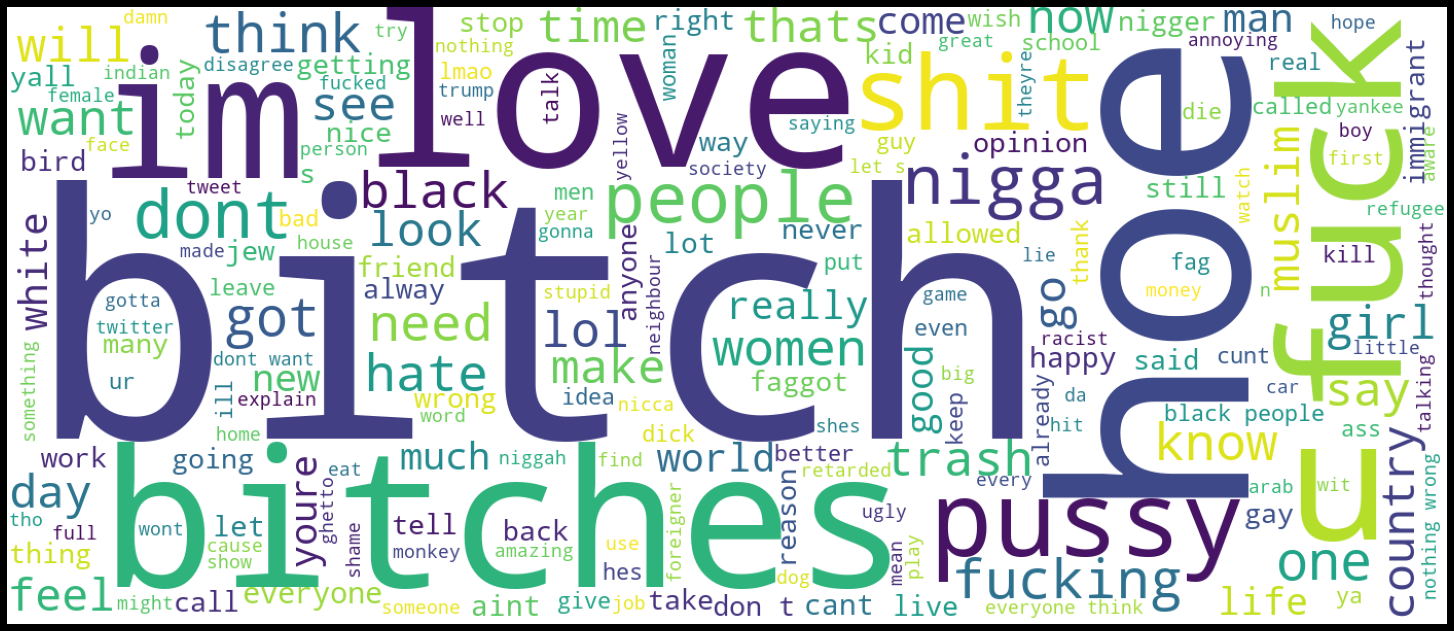

In [78]:
#Generate a wordcloud
wordcloud = generateWordCloud(' '.join(df['tweet']))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [79]:
# Split Dataset to get a validation dataset for later explanations using LIME and a train & test dataset
df_neither =  df.loc[df['label'] == 2]
df_offensive = df.loc[df['label'] == 1]
df_hate = df.loc[df['label'] == 0]

validationSize = int(df_neither.shape[0] * 0.95)
trainSize = int(df_neither.shape[0] * 0.20)

validationSet_neither = df_neither[validationSize:]
validationSet_offensive = df_offensive[validationSize:]
validationSet_hate = df_hate[validationSize:]

validationSet = pd.concat([validationSet_neither, validationSet_offensive, validationSet_hate], ignore_index=True)

In [80]:
df = pd.concat([df_neither[:validationSize], df_offensive[:validationSize], df_hate[:validationSize]], ignore_index=True)

In [81]:
validationSet["label"].value_counts()
validationSet.reset_index(inplace=True, drop=True))
#validationSet.drop(['index'], axis=1)

In [82]:
validationSet["label"].value_counts()

2    900
1    900
0    900
Name: label, dtype: int64

In [83]:
df["label"].value_counts()

2    17100
1    17100
0    17100
Name: label, dtype: int64

### 2.2 Stopwords Removal

In [84]:
#Import nltk library to retrieve a list of all stopwords in english
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

preprocessing_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirmozahebi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
print(len(preprocessing_stopwords))
preprocessing_stopwords

179


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [86]:
additionalStopwords = ["u", "im"]
preprocessing_stopwords = set().union(preprocessing_stopwords, additionalStopwords)

In [87]:
#Remove stopwords function
def removeStopwords(tweet):
    filtered = [word for word in tweet.split() if word not in preprocessing_stopwords]
    return " ".join(filtered)

In [88]:
df["tweet"] = df["tweet"].apply(removeStopwords)

In [89]:
df.head(10)

,label,tweet
0,2,cena de cumple thanks mom brithday home family
1,2,stage time red carpet schedule red carpet la k...
2,2,government acted earlyyyyyyyyyyyy last acted d...
3,2,quick stop route etihad roses
4,2,many aboriginal people street
5,2,draw finished evasion relaxing wellness proud
6,2,nothing freaks riding camel theyre unpredictable
7,2,fucking hate shitting nhs system france much b...
8,2,general pull pin grenade pose selfie
9,2,hedonism worst bullshit anyone think


In [90]:
df.tweet

0           cena de cumple thanks mom brithday home family
1        stage time red carpet schedule red carpet la k...
2        government acted earlyyyyyyyyyyyy last acted d...
3                            quick stop route etihad roses
4                            many aboriginal people street
                               ...                        
51295                   beautiful sister converted hijabbb
51296    low iq black colonies racist ideologues master...
51297                      people call curry boy dont know
51298    everyone thinks bumders amazing nothing wrong ...
51299                     johnny rebel quit bitchin nigger
Name: tweet, Length: 51300, dtype: object

In [91]:
wordCounter = countAppearance(df["tweet"])

In [92]:
len(wordCounter)

36021

In [93]:
wordCounter

Counter({'cena': 1,
         'de': 34,
         'cumple': 1,
         'thanks': 208,
         'mom': 142,
         'brithday': 4,
         'home': 330,
         'family': 339,
         'stage': 25,
         'time': 929,
         'red': 138,
         'carpet': 39,
         'schedule': 8,
         'la': 58,
         'know': 1382,
         'mean': 308,
         'government': 134,
         'acted': 6,
         'earlyyyyyyyyyyyy': 1,
         'last': 282,
         'dey': 32,
         'r': 324,
         'arresting': 4,
         'godavari': 1,
         'districts': 2,
         'coastal': 1,
         'people': 3962,
         'quick': 54,
         'stop': 803,
         'route': 9,
         'etihad': 1,
         'roses': 15,
         'many': 784,
         'aboriginal': 43,
         'street': 154,
         'draw': 18,
         'finished': 37,
         'evasion': 2,
         'relaxing': 10,
         'wellness': 9,
         'proud': 146,
         'nothing': 612,
         'freaks': 18,
         'rid

In [94]:
wordCounter.most_common(10)

[('bitch', 7517),
 ('like', 4222),
 ('people', 3962),
 ('love', 2919),
 ('dont', 2886),
 ('bitches', 2837),
 ('fucking', 2762),
 ('black', 2332),
 ('hoes', 2150),
 ('get', 2075)]

<BarContainer object of 10 artists>

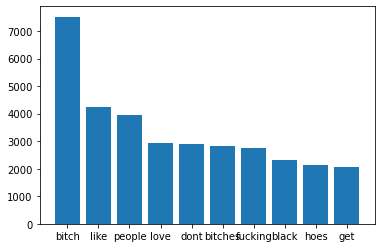

In [95]:
y = [count for tag, count in wordCounter.most_common(10)]
x = [tag for tag, count in wordCounter.most_common(10)]
plt.bar(x, y)

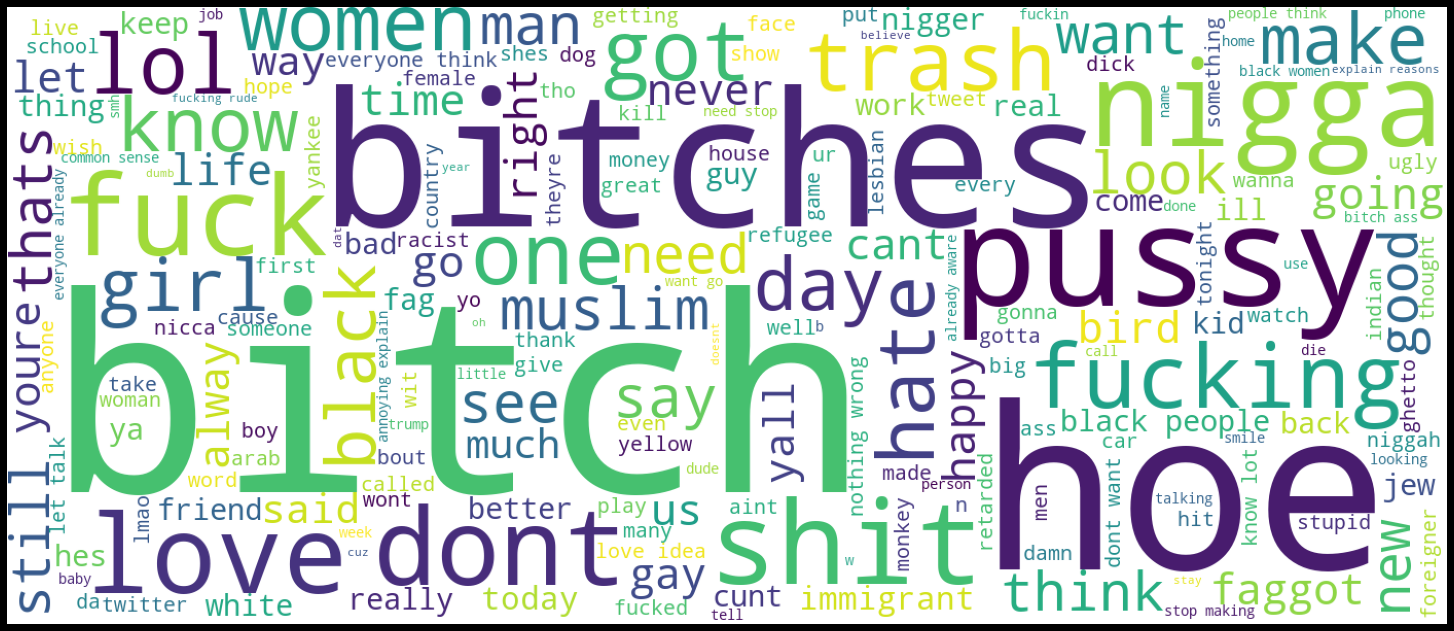

<Figure size 432x288 with 0 Axes>

In [96]:
#Generate a wordcloud
wordcloud = generateWordCloud(' '.join(df['tweet']))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('../plots/preprocessing_plots/wc_after.png', dpi=300)

In [97]:
#Get the number of unique words before tokenization & lemmatization
numWords = len(wordCounter)

## Split dataset into training and test set

In [98]:
# Split Dataset to get a validation dataset for later explanations using LIME and a train & test dataset
df_neither =  df.loc[df['label'] == 2]
df_offensive = df.loc[df['label'] == 1]
df_hate = df.loc[df['label'] == 0]

trainSet_neither = df_neither[trainSize:]
trainSet_offensive = df_offensive[trainSize:]
trainSet_hate = df_hate[trainSize:]

trainSet = pd.concat([trainSet_neither, trainSet_offensive, trainSet_hate], ignore_index=True)
trainSet = trainSet.sample(frac=1)

In [99]:
testSet = pd.concat([df_neither[:trainSize], df_offensive[:trainSize], df_hate[:trainSize]], ignore_index=True)
testSet = testSet.sample(frac=1)

In [100]:
trainSet["label"].value_counts()

1    13500
2    13500
0    13500
Name: label, dtype: int64

In [101]:
trainSet.head(10)

,label,tweet
23943,1,damn hoe
15123,1,arturo keeps calling ghetto
4213,2,time kiss kiss waiting works
18820,1,likely signs crazy bitches aries taurus gemini...
6261,2,happiness best day smille face
39194,0,carl paladino says michelle obama live gorilla...
6772,2,nigor
8620,2,short people smart extent
3277,2,fuck hate argentina
3481,2,raining morning playtime moved indoors silly d...


In [102]:
trainTweets = trainSet.tweet
trainLabels = trainSet.label

In [103]:
testSet["label"].value_counts()

1    3600
2    3600
0    3600
Name: label, dtype: int64

In [104]:
testTweets = testSet.tweet
testLabels = testSet.label

### 2.2 Tokenization

In [105]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amirmozahebi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [106]:
trainTweets.shape, testTweets.shape

((40500,), (10800,))

In [107]:
trainWordTokens = [nltk.word_tokenize(tweet) for tweet in trainTweets]
testWordTokens = [nltk.word_tokenize(tweet) for tweet in testTweets]

In [108]:
trainTokens_length = [len(tokens) for tokens in trainWordTokens]

In [109]:
count = Counter(trainTokens_length)
count.most_common()

[(5, 4755),
 (4, 4688),
 (6, 4574),
 (3, 4056),
 (7, 3728),
 (8, 3372),
 (9, 2685),
 (10, 2327),
 (2, 2193),
 (11, 1971),
 (12, 1548),
 (13, 1239),
 (14, 875),
 (15, 566),
 (16, 372),
 (17, 352),
 (1, 329),
 (19, 219),
 (18, 179),
 (20, 99),
 (22, 89),
 (21, 58),
 (23, 55),
 (24, 34),
 (27, 21),
 (26, 18),
 (25, 12),
 (0, 11),
 (28, 10),
 (29, 8),
 (30, 7),
 (35, 4),
 (42, 4),
 (34, 4),
 (38, 4),
 (32, 4),
 (40, 3),
 (33, 3),
 (31, 3),
 (37, 2),
 (51, 2),
 (50, 2),
 (39, 2),
 (36, 2),
 (99, 1),
 (70, 1),
 (59, 1),
 (49, 1),
 (67, 1),
 (54, 1),
 (113, 1),
 (43, 1),
 (48, 1),
 (41, 1),
 (56, 1)]

In [112]:
trainWordTokens[0:5]

[['damn', 'hoe'],
 ['arturo', 'keeps', 'calling', 'ghetto'],
 ['time', 'kiss', 'kiss', 'waiting', 'works'],
 ['likely',
  'signs',
  'crazy',
  'bitches',
  'aries',
  'taurus',
  'gemini',
  'cancer',
  'leo',
  'virgo',
  'libra',
  'scorpio',
  'sagittarius',
  'capricorn',
  'aq'],
 ['happiness', 'best', 'day', 'smille', 'face']]

In [113]:
testWordTokens

[['hate',
  'bitches',
  'tryna',
  'put',
  'friendzonebitch',
  'tryna',
  'score',
  'put',
  'endzone'],
 ['goofin',
  'family',
  'selfie',
  'smiles',
  'classicman',
  'dapper',
  'beard',
  'blueeyes',
  'basilica'],
 ['women', 'created', 'equal', 'bitches'],
 ['everyone',
  'thinks',
  'pikeys',
  'amazing',
  'nothing',
  'wrong',
  'understand',
  'people',
  'wrong',
  'disagree',
  'opinions',
  'need',
  'stop',
  'making',
  'incredible'],
 ['sending',
  'good',
  'vibes',
  'way',
  'happy',
  'friday',
  'tgifriday',
  'goodvibesonly',
  'becauseimhappy',
  'smilemore'],
 ['acab', 'cops', 'bastards'],
 ['walking',
  'calico',
  'degrees',
  'alaska',
  'sunshine',
  'kitty',
  'gay',
  'instagay',
  'alaska'],
 ['br', 'wn', 'bigger', 'offspring', 'r', 'bb', 'ts'],
 ['hate',
  'men',
  'much',
  'trying',
  'look',
  'like',
  'one',
  'stupid',
  'little',
  'cunt'],
 ['ward',
  'thuggery',
  'cheating',
  'talking',
  'trash',
  'whos',
  'besides',
  'jameis',
  'isn

### Add Lemminization before creating word index and after Tokenization


In [114]:
#Download NLTK dependencies for lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amirmozahebi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amirmozahebi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [115]:
#Import and initialize Lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [116]:
#Lemmatization Function
def lemmatizing(tweets):
    lemmatized_text = [lemmatizer.lemmatize(token) for token in tweets]
    return lemmatized_text

In [117]:
lemmatizedTrainTweets = [lemmatizing(tokens) for tokens in trainWordTokens]
lemmatizedTestTweets = [lemmatizing(tokens) for tokens in testWordTokens]

In [118]:
print(trainTweets[0])
print(lemmatizedTrainTweets[0])

politicians bent
['damn', 'hoe']


### Create a word index & Text to sequences

In [119]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [120]:
tokenizer = Tokenizer(num_words=numWords, oov_token = "<OOV>" )
tokenizer.fit_on_texts(lemmatizedTrainTweets)

In [121]:
word_index = tokenizer.word_index

In [122]:
word_index

{'<OOV>': 1,
 'bitch': 2,
 'like': 3,
 'people': 4,
 'hoe': 5,
 'love': 6,
 'dont': 7,
 'fucking': 8,
 'black': 9,
 'woman': 10,
 'get': 11,
 'pussy': 12,
 'fuck': 13,
 'shit': 14,
 'think': 15,
 'nigga': 16,
 'got': 17,
 'one': 18,
 'as': 19,
 'know': 20,
 'want': 21,
 'hate': 22,
 'white': 23,
 'go': 24,
 'trash': 25,
 'would': 26,
 'day': 27,
 'need': 28,
 'cant': 29,
 'time': 30,
 'lol': 31,
 'make': 32,
 'everyone': 33,
 'really': 34,
 'aint': 35,
 'country': 36,
 'look': 37,
 'good': 38,
 'see': 39,
 'say': 40,
 'let': 41,
 'man': 42,
 'muslim': 43,
 'girl': 44,
 'thats': 45,
 'feel': 46,
 'life': 47,
 'stop': 48,
 'many': 49,
 'world': 50,
 'never': 51,
 'call': 52,
 'back': 53,
 'happy': 54,
 'wrong': 55,
 'tell': 56,
 'new': 57,
 'right': 58,
 'much': 59,
 'come': 60,
 'friend': 61,
 'gay': 62,
 'today': 63,
 'na': 64,
 'bad': 65,
 'talk': 66,
 'youre': 67,
 'getting': 68,
 'even': 69,
 'yall': 70,
 'men': 71,
 'take': 72,
 'lot': 73,
 'still': 74,
 'bird': 75,
 'going': 76,
 

In [123]:
vocabSize = len(word_index) + 1

In [124]:
vocabSize

28829

In [125]:
#Apply tokenization on tweets of training and test dataset
trainSequences = tokenizer.texts_to_sequences(lemmatizedTrainTweets) 
testSequences = tokenizer.texts_to_sequences(lemmatizedTestTweets)

In [126]:
#Comparison of tweets before and after tokenization
print(lemmatizedTrainTweets[1])
print(trainSequences[1])
print(trainLabels[1])
print(lemmatizedTestTweets[0])
print(testSequences[0])

['arturo', 'keep', 'calling', 'ghetto']
[12032, 128, 240, 214]
2
['hate', 'bitch', 'tryna', 'put', 'friendzonebitch', 'tryna', 'score', 'put', 'endzone']
[22, 2, 386, 146, 1, 386, 1772, 146, 16897]


### Check length of dataset sequences & apply padding

#### Check training data

In [127]:
#Identify the longest tweet inside the training data
max_train_length = max(trainSequences, key = len)
len(max_train_length)

113

In [128]:
trainSequences_length = [len(seq) for seq in trainSequences]
indices = [i for i in range(0, len(trainSequences))]

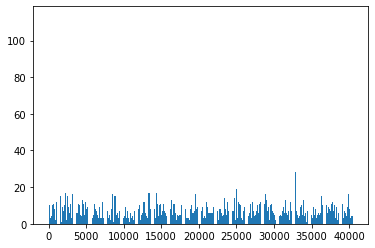

In [129]:
plt.bar(indices,trainSequences_length)
plt.show()

In [130]:
count = Counter(trainSequences_length)
count.most_common()

[(5, 4755),
 (4, 4688),
 (6, 4574),
 (3, 4056),
 (7, 3728),
 (8, 3372),
 (9, 2685),
 (10, 2327),
 (2, 2193),
 (11, 1971),
 (12, 1548),
 (13, 1239),
 (14, 875),
 (15, 566),
 (16, 372),
 (17, 352),
 (1, 329),
 (19, 219),
 (18, 179),
 (20, 99),
 (22, 89),
 (21, 58),
 (23, 55),
 (24, 34),
 (27, 21),
 (26, 18),
 (25, 12),
 (0, 11),
 (28, 10),
 (29, 8),
 (30, 7),
 (35, 4),
 (42, 4),
 (34, 4),
 (38, 4),
 (32, 4),
 (40, 3),
 (33, 3),
 (31, 3),
 (37, 2),
 (51, 2),
 (50, 2),
 (39, 2),
 (36, 2),
 (99, 1),
 (70, 1),
 (59, 1),
 (49, 1),
 (67, 1),
 (54, 1),
 (113, 1),
 (43, 1),
 (48, 1),
 (41, 1),
 (56, 1)]

In [131]:
train = {"tweet": trainSequences,  "sequenceLength": trainSequences_length,"label": trainLabels}
train = pd.DataFrame(train)

In [132]:
train.head(10)

In [133]:
len(train)

In [134]:
train = train.loc[(train.sequenceLength > 0)] #& (train.sequenceLength < 31)]

In [135]:
len(train)

In [136]:
train["label"].value_counts()

In [137]:
trainSequences = train.tweet
trainLabels = train.label

#### Check test data

In [138]:
#Identify the longest tweet inside the testing data
max_test_length = max(testSequences, key = len)
len(max_test_length)

130

In [139]:
testSequences_length = [len(seq) for seq in testSequences]
indices = [i for i in range(0, len(testSequences))]

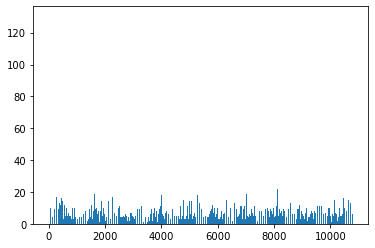

In [140]:
plt.bar(indices,testSequences_length)
plt.show()

In [141]:
count = Counter(testSequences_length)
count.most_common()

[(5, 1321),
 (4, 1239),
 (6, 1186),
 (7, 1019),
 (3, 992),
 (8, 876),
 (9, 785),
 (10, 631),
 (2, 607),
 (11, 507),
 (12, 428),
 (13, 325),
 (14, 228),
 (15, 148),
 (16, 107),
 (17, 86),
 (1, 76),
 (19, 63),
 (18, 52),
 (20, 27),
 (22, 26),
 (25, 11),
 (21, 9),
 (23, 8),
 (29, 6),
 (24, 5),
 (27, 5),
 (26, 5),
 (30, 4),
 (0, 4),
 (33, 2),
 (46, 1),
 (42, 1),
 (35, 1),
 (44, 1),
 (40, 1),
 (130, 1),
 (57, 1),
 (49, 1),
 (68, 1),
 (78, 1),
 (56, 1),
 (31, 1)]

In [142]:
test = {"tweet": testSequences,  "sequenceLength": testSequences_length,"label": testLabels}
test = pd.DataFrame(test)

In [143]:
test.head(10)

,tweet,sequenceLength,label
5410,"[22, 2, 386, 146, 1, 386, 1772, 146, 16897]",9,1
437,"[1, 109, 825, 302, 1, 1, 2692, 1, 1]",9,2
8194,"[10, 2141, 1162, 2]",4,0
8630,"[33, 15, 2288, 177, 78, 55, 111, 4, 55, 225, 8...",15,0
3255,"[1271, 38, 2173, 88, 54, 390, 1, 1, 1, 1]",10,2
850,"[6350, 887, 972]",3,2
2019,"[1070, 1, 1769, 11433, 2138, 1988, 62, 5928, 1...",9,2
8949,"[3459, 11400, 1143, 11919, 153, 3960, 4401]",7,0
3755,"[22, 71, 59, 330, 37, 3, 18, 97, 95, 83]",10,1
3459,"[12103, 1, 1615, 171, 25, 777, 3133, 7511, 319...",13,2


In [144]:
len(test)

10800

In [145]:
test = test.loc[(test.sequenceLength > 0)] #& (test.sequenceLength < 31)]

In [146]:
len(test)

10796

In [147]:
testSequences = test.tweet
testLabels = test.label

#### Padding

In [148]:
#Define padding length
sequenceLength = 25 

paddedTrainSequences = pad_sequences(trainSequences, maxlen=sequenceLength, padding="post", truncating="post")
paddedTestSequences = pad_sequences(testSequences, maxlen=sequenceLength, padding="post", truncating="post")

In [149]:
#Comparison of tweets before, after tokenization and after padding
print(paddedTrainSequences[0])
print(paddedTestSequences[0])

[151   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
[   22     2   386   146     1   386  1772   146 16897     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0]


## 3. Store variables to be processed in the upcoming notebooks (LSTM, RNN & GRU Training)

In [150]:
%store sequenceLength
%store vocabSize
%store paddedTrainSequences
%store trainLabels
%store paddedTestSequences
%store testLabels
%store validationSet
%store tokenizer
%store word_index

Stored 'sequenceLength' (int)
Stored 'vocabSize' (int)
Stored 'paddedTrainSequences' (ndarray)
Stored 'trainLabels' (Series)
Stored 'paddedTestSequences' (ndarray)
Stored 'testLabels' (Series)
Stored 'validationSet' (DataFrame)
Stored 'tokenizer' (Tokenizer)
Stored 'word_index' (dict)
